### Training of modified U-Net for Optic Disc on DRISHTI-GS database (cross-validation fold #0).

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Accessing data, preparing train/validation sets division:

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')

###############################################################################################################

img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']

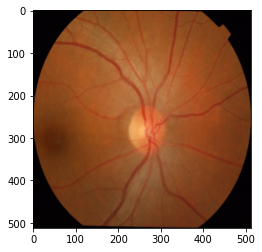

(<HDF5 dataset "images": shape (50, 512, 512, 3), type "|u1">,
 <HDF5 dataset "cup": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc": shape (50, 512, 512, 1), type "|u1">,
 <HDF5 dataset "disc_locations": shape (50, 4), type "<i8">)

(50, 512, 512, 3)


In [3]:
plt.imshow(img_train[45])
plt.show()
print(img_train.shape)
img_train, cup_train, disc_train, disc_locations

### Train images

In [4]:
l_channel_train = convert_to_lab(0, img_train)
len(l_channel_train)

50

### Test images

In [5]:
l_channel_test = convert_to_lab(0, img_test)
len(l_channel_test)

51

#### Generator of augmented data:

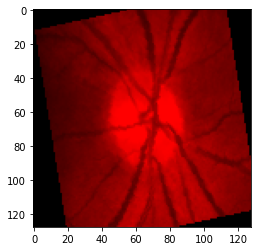

In [6]:
gen = data_generator(l_channel_train, cup_train, disc_locations, 128, 'train', batch_size=1)
batch = next(gen)

plt.imshow(batch[0][0])

51
51


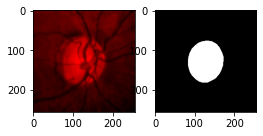

In [7]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(l_channel_test, cup_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))
print(len(X_test)) 
print(len(Y_test))

#-----------------------
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1, 2, 1)
ax.imshow(np.squeeze(X_test[10]), cmap=plt.cm.Greys_r)
ax = fig.add_subplot(1, 2, 2)
ax.imshow(np.squeeze(Y_test[10]), cmap=plt.cm.Greys_r)
plt.show()

### Training and test cup

In [8]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size)
history_cup = train(l_channel_train, 
                    cup_train, 
                    disc_locations, 
                    'cup_l', 
                    model, 
                    epochs, X_test, Y_test, img_size, spe)

3/3 [==============================] - 14s 5s/step - loss: 1.4956 - mean_IOU_gpu: 0.0666 - dice_metric: 0.1249 - val_loss: 1.4675 - val_mean_IOU_gpu: 0.0500 - val_dice_metric: 0.0945


### Visual check

image #0


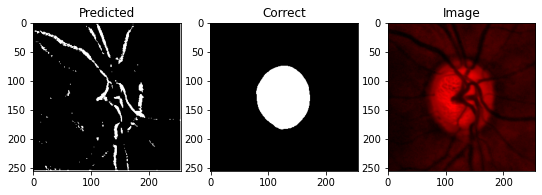

IOU: 0.07299130409955978
Dice: 0.1360519989315288
image #1


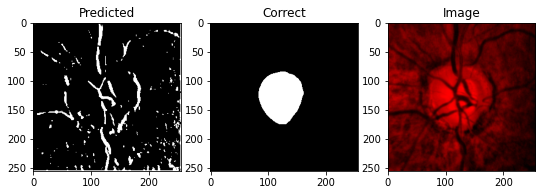

IOU: 0.0683344155550003
Dice: 0.1279270146984288
image #2


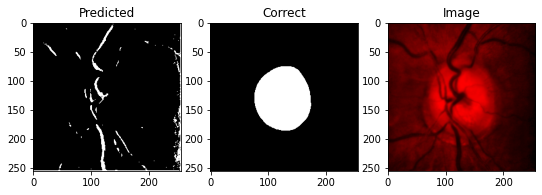

IOU: 0.041322313249111176
Dice: 0.07936507936507936
image #3


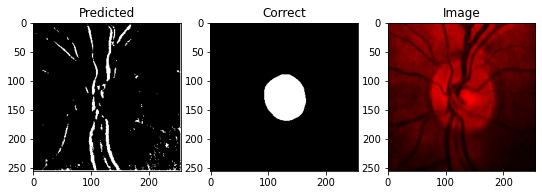

IOU: 0.05695187300443649
Dice: 0.10776625347837086
image #4


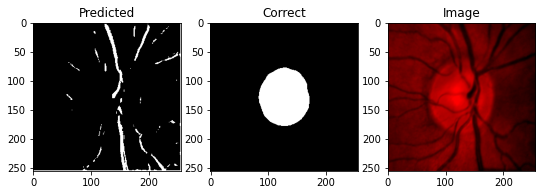

IOU: 0.04017094150185585
Dice: 0.07723911257189811
image #5


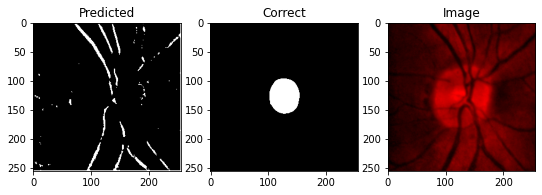

IOU: 0.028765792027115822
Dice: 0.05592291706026828
image #6


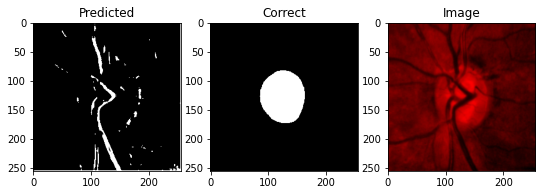

IOU: 0.06886029243469238
Dice: 0.1288480635551142
image #7


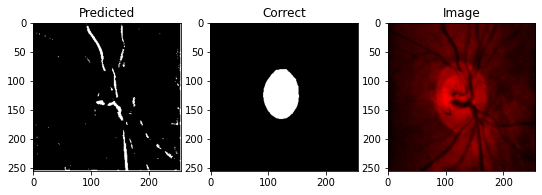

IOU: 0.0584116131067276
Dice: 0.1103759883814749
image #8


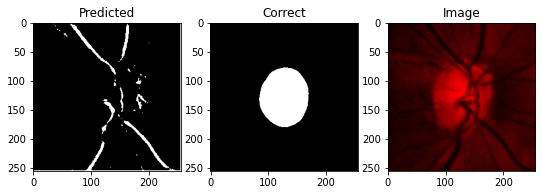

IOU: 0.04475661367177963
Dice: 0.08567854909318325
image #9


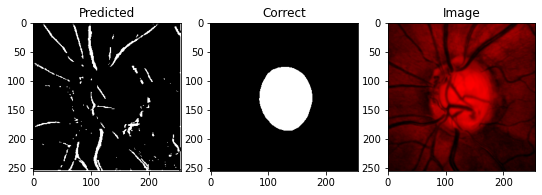

IOU: 0.02189265564084053
Dice: 0.04284727021423635
image #10


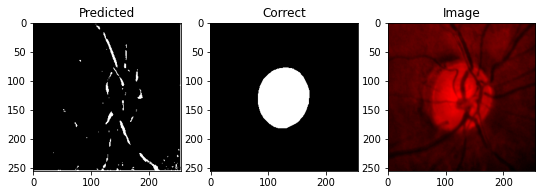

IOU: 0.03349282220005989
Dice: 0.06481481481481481
image #11


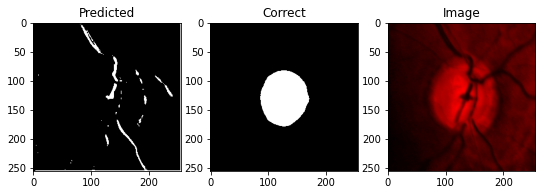

IOU: 0.0399274043738842
Dice: 0.07678883071553229
image #12


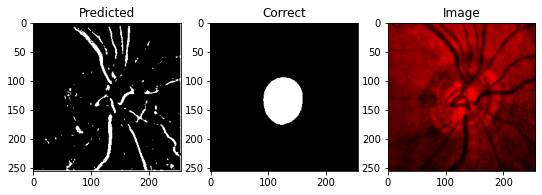

IOU: 0.05803459510207176
Dice: 0.10970264186707736
image #13


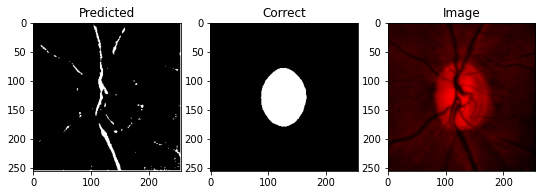

IOU: 0.06088992953300476
Dice: 0.11479028697571744
image #14


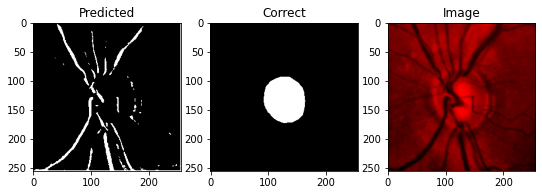

IOU: 0.05235331878066063
Dice: 0.09949761058693787
image #15


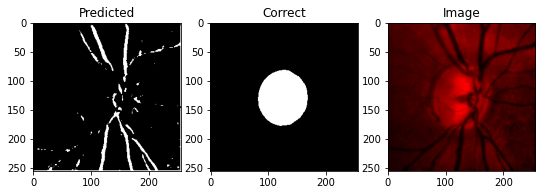

IOU: 0.035325806587934494
Dice: 0.06824094456674004
image #16


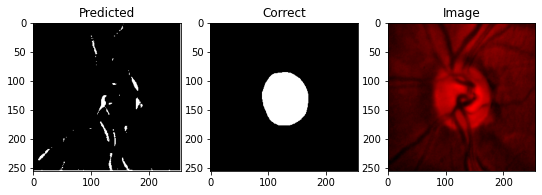

IOU: 0.031467556953430176
Dice: 0.06101511879049676
image #17


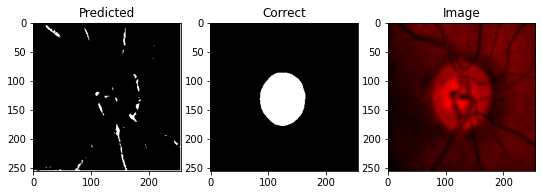

IOU: 0.018239721655845642
Dice: 0.03582598805800398
image #18


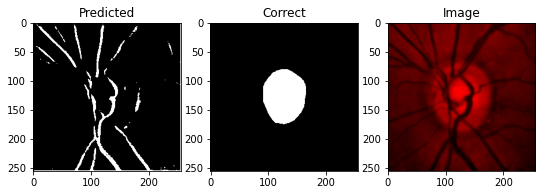

IOU: 0.09392201900482178
Dice: 0.17171611280008386
image #19


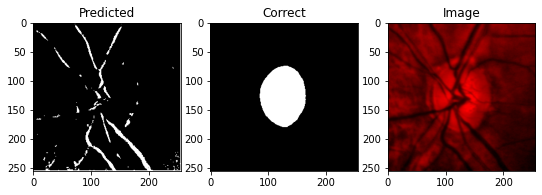

IOU: 0.0502854622900486
Dice: 0.09575580179803471
image #20


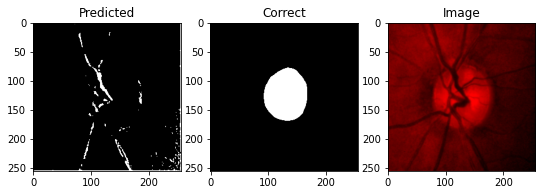

IOU: 0.05944576859474182
Dice: 0.11222050344536634
image #21


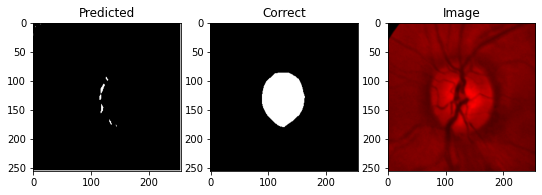

IOU: 0.02496965415775776
Dice: 0.048722720351886316
image #22


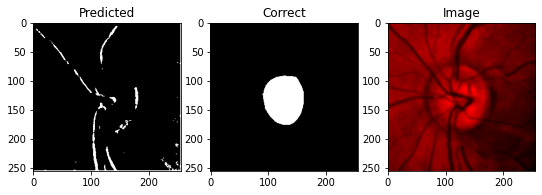

IOU: 0.034121930599212646
Dice: 0.06599208095028597
image #23


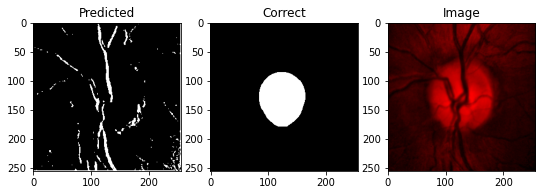

IOU: 0.06741039454936981
Dice: 0.12630642650655993
image #24


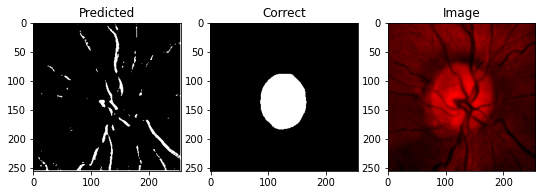

IOU: 0.06018352881073952
Dice: 0.1135341726618705
image #25


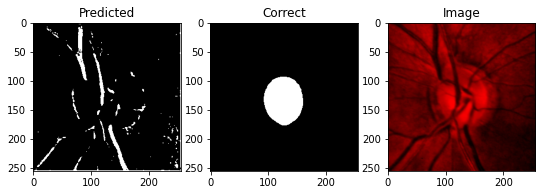

IOU: 0.05656171590089798
Dice: 0.1070675105485232
image #26


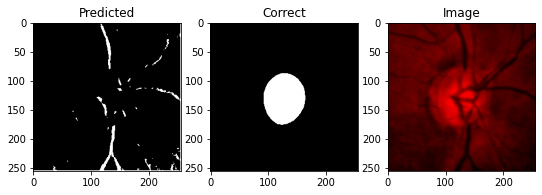

IOU: 0.028508448973298073
Dice: 0.055436490927275324
image #27


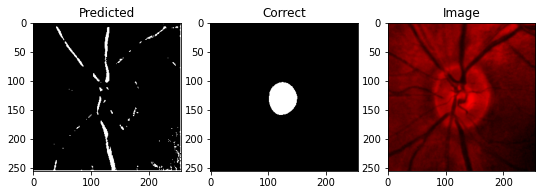

IOU: 0.029036004096269608
Dice: 0.056433408577878104
image #28


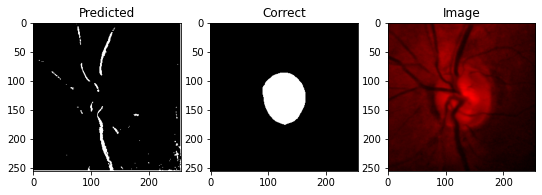

IOU: 0.02278820425271988
Dice: 0.04456094364351245
image #29


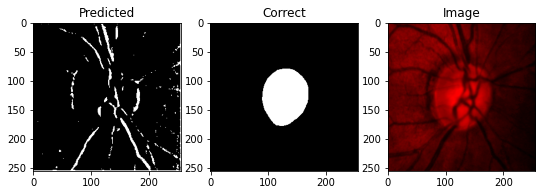

IOU: 0.0485987551510334
Dice: 0.09269275638986106
image #30


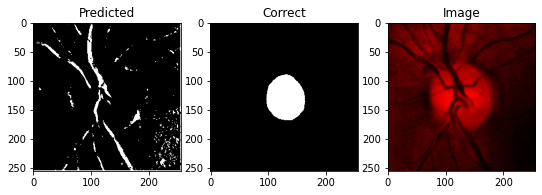

IOU: 0.061250001192092896
Dice: 0.1154299175500589
image #31


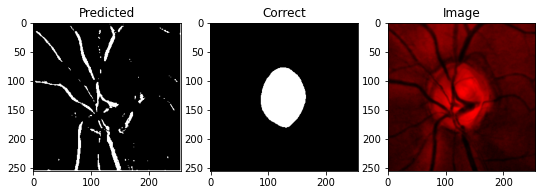

IOU: 0.06807307153940201
Dice: 0.12746894726125024
image #32


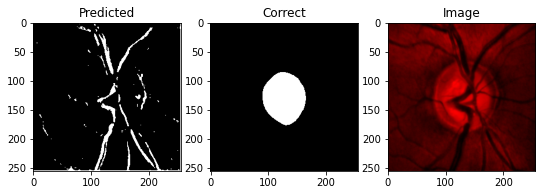

IOU: 0.06668294966220856
Dice: 0.12502862376917792
image #33


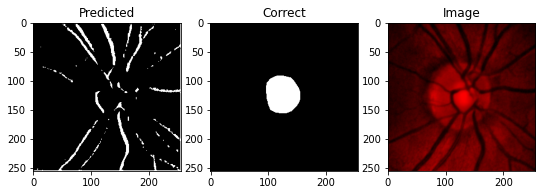

IOU: 0.04225141927599907
Dice: 0.08107720956882968
image #34


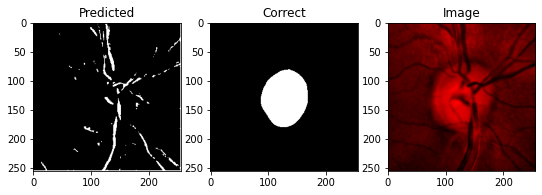

IOU: 0.06162566319108009
Dice: 0.11609678518686811
image #35


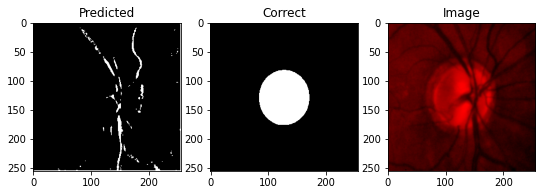

IOU: 0.032574087381362915
Dice: 0.06309297912713473
image #36


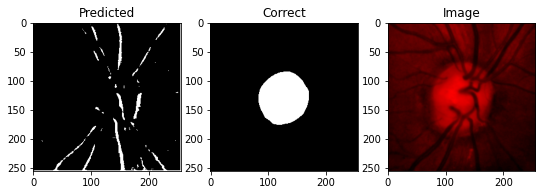

IOU: 0.028294166550040245
Dice: 0.05503126776577601
image #37


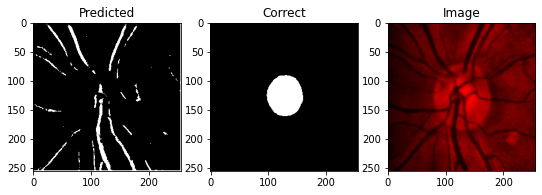

IOU: 0.0482267402112484
Dice: 0.09201585503963759
image #38


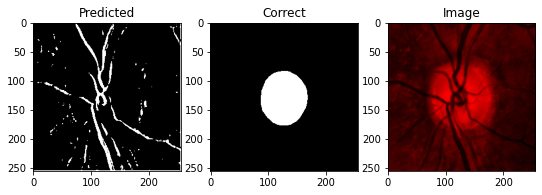

IOU: 0.09902632981538773
Dice: 0.1802073895097151
image #39


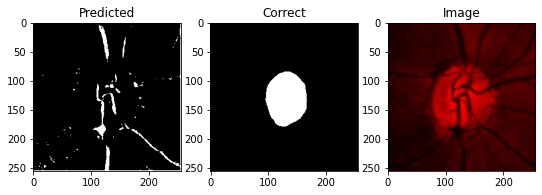

IOU: 0.07668668776750565
Dice: 0.14244940321743643
image #40


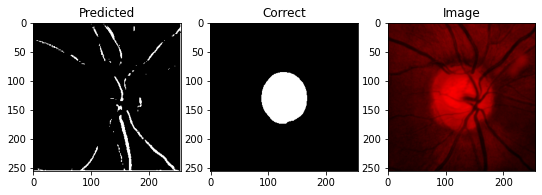

IOU: 0.031047025695443153
Dice: 0.06022426609550208
image #41


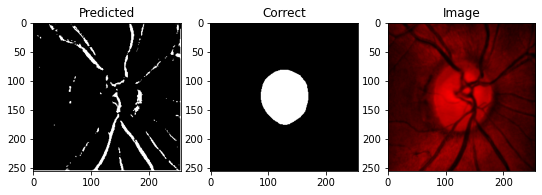

IOU: 0.041067980229854584
Dice: 0.07889586981151508
image #42


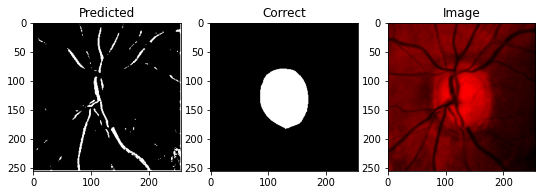

IOU: 0.06640411168336868
Dice: 0.12453836684448091
image #43


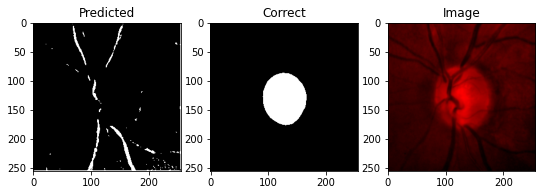

IOU: 0.021477067843079567
Dice: 0.042051003798155184
image #44


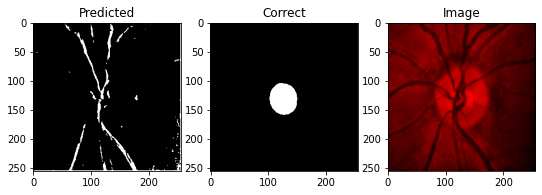

IOU: 0.0645894929766655
Dice: 0.12134159367656484
image #45


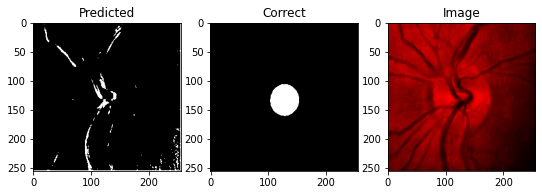

IOU: 0.10040595382452011
Dice: 0.1824889326119036
image #46


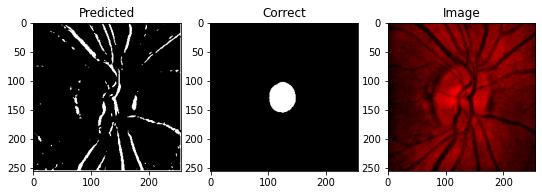

IOU: 0.04575619846582413
Dice: 0.08750835003340013
image #47


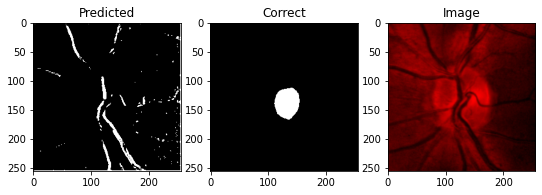

IOU: 0.05880923569202423
Dice: 0.11108560936424144
image #48


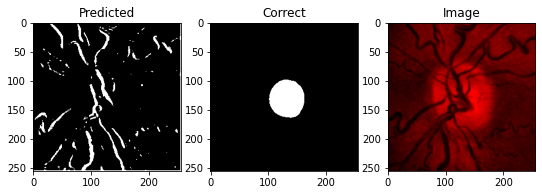

IOU: 0.06500791013240814
Dice: 0.12207967589466577
image #49


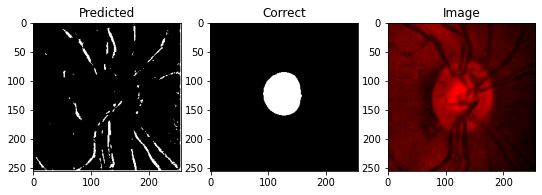

IOU: 0.011027189902961254
Dice: 0.021813835350366056
image #50


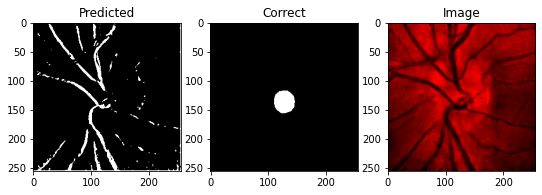

IOU: 0.027179384604096413
Dice: 0.052920423363386905


In [9]:
pred_iou, pred_dice, pred_cup = predict(l_channel_test, X_test, Y_test, model, img_size)

In [10]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.04951928
0.09364673955227662


### Training and Test disc

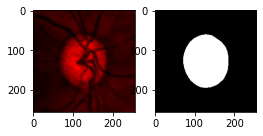

In [11]:
X_test, Z_test = next(data_generator(l_channel_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

num = 1
for i in range(num):
    fig = plt.figure(figsize=(4, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(np.squeeze(X_test[i]), cmap=plt.cm.Greys_r)
    ax = fig.add_subplot(1, 2, 2)
    ax.imshow(np.squeeze(Z_test[i]), cmap=plt.cm.Greys_r)
    plt.show()
    print('=========================')

In [12]:
history_disc = train(l_channel_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_l', 
                     model, epochs, X_test, Z_test, img_size, spe)

3/3 [==============================] - 11s 5s/step - loss: 1.0040 - mean_IOU_gpu: 0.1253 - dice_metric: 0.2226 - val_loss: 1.0097 - val_mean_IOU_gpu: 0.0467 - val_dice_metric: 0.0888


image #0


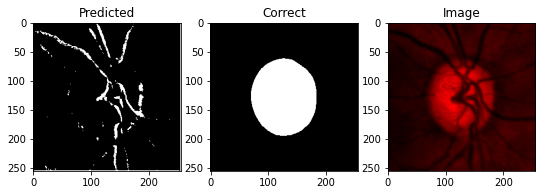

IOU: 0.06415881216526031
Dice: 0.12058127745860088
image #1


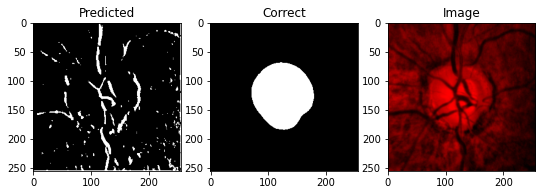

IOU: 0.059340137988328934
Dice: 0.11203226529240422
image #2


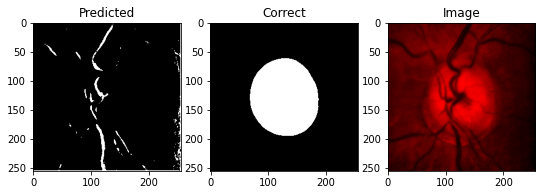

IOU: 0.03874591365456581
Dice: 0.07460132776675107
image #3


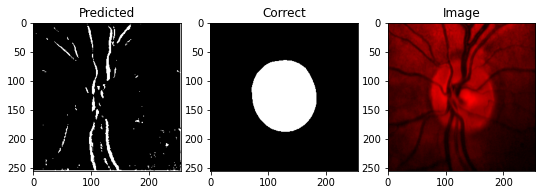

IOU: 0.05912303552031517
Dice: 0.11164526081653153
image #4


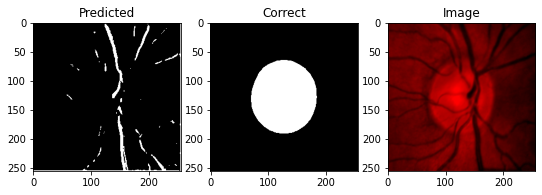

IOU: 0.03943745791912079
Dice: 0.07588231083112607
image #5


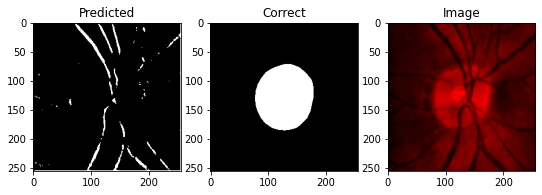

IOU: 0.031241701915860176
Dice: 0.06059045657397871
image #6


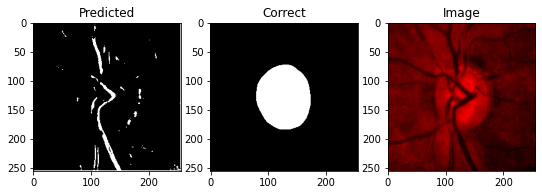

IOU: 0.059320349246263504
Dice: 0.11199699840540286
image #7


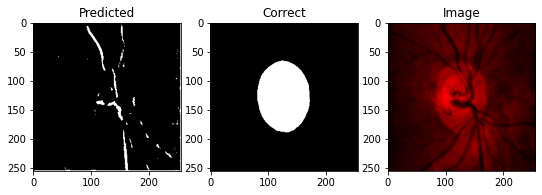

IOU: 0.04842854291200638
Dice: 0.09238310708898945
image #8


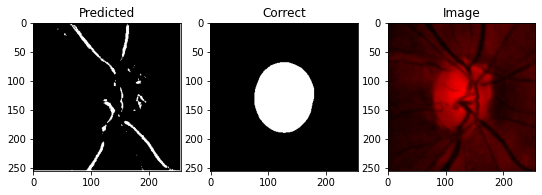

IOU: 0.041341062635183334
Dice: 0.0793996610990075
image #9


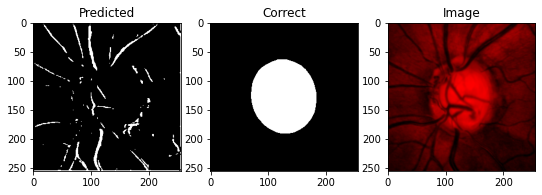

IOU: 0.02723844163119793
Dice: 0.05303236333967909
image #10


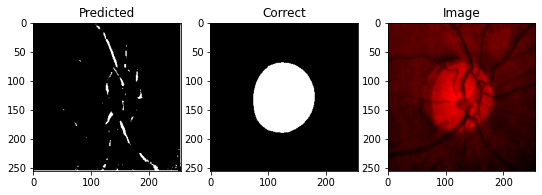

IOU: 0.02732192724943161
Dice: 0.053190585436315746
image #11


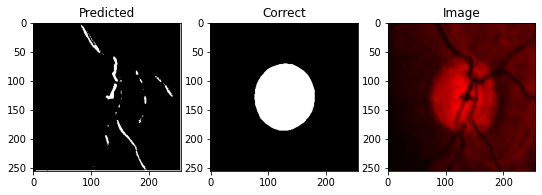

IOU: 0.03610982000827789
Dice: 0.06970268570915297
image #12


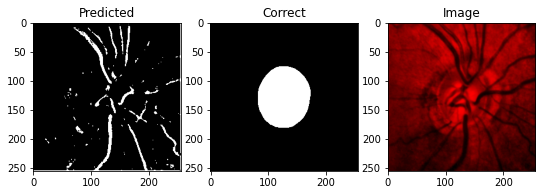

IOU: 0.06858427822589874
Dice: 0.1283647523016221
image #13


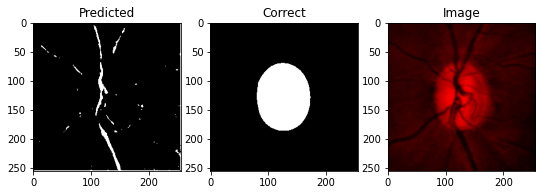

IOU: 0.051824379712343216
Dice: 0.09854188506623464
image #14


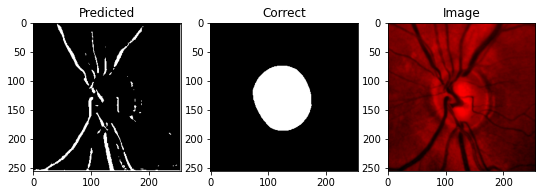

IOU: 0.06356116384267807
Dice: 0.11952517396643471
image #15


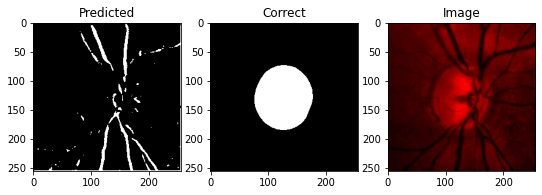

IOU: 0.03722809627652168
Dice: 0.07178381962864722
image #16


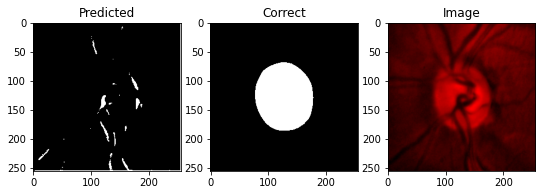

IOU: 0.022388767451047897
Dice: 0.04379697503943584
image #17


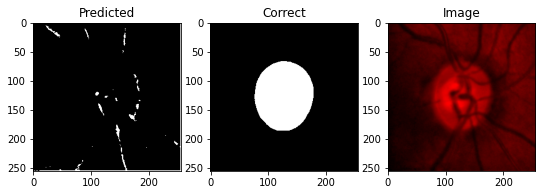

IOU: 0.012463686987757683
Dice: 0.024620510921880785
image #18


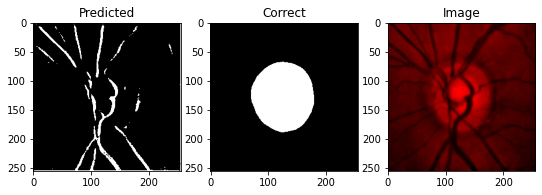

IOU: 0.0759192481637001
Dice: 0.1411244292237443
image #19


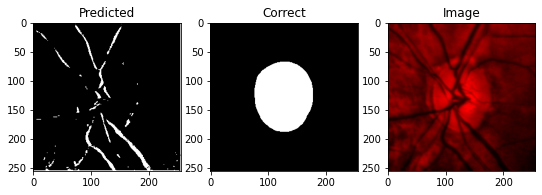

IOU: 0.045371901243925095
Dice: 0.08680528104988537
image #20


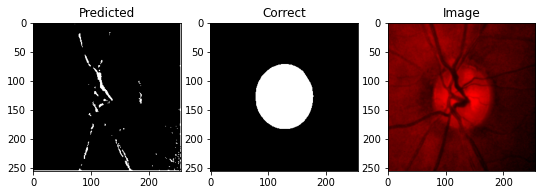

IOU: 0.0446501225233078
Dice: 0.0854833998636939
image #21


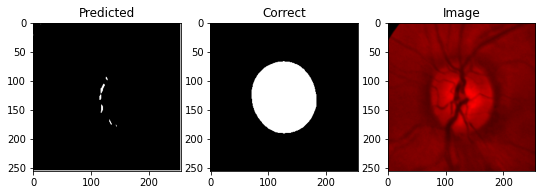

IOU: 0.012042935937643051
Dice: 0.023799258428904027
image #22


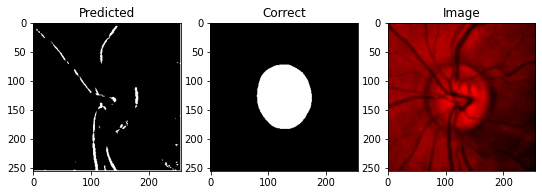

IOU: 0.026111504063010216
Dice: 0.05089408528198074
image #23


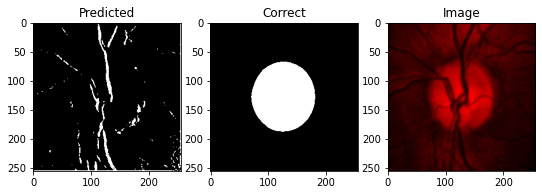

IOU: 0.0530163049697876
Dice: 0.1006941795712869
image #24


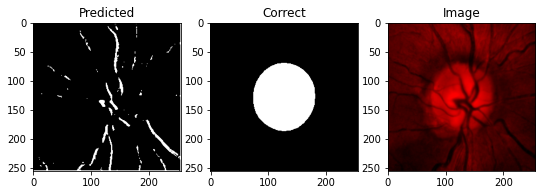

IOU: 0.04977337643504143
Dice: 0.09482689693771489
image #25


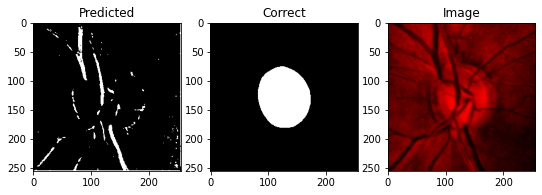

IOU: 0.05168402940034866
Dice: 0.09828813233314099
image #26


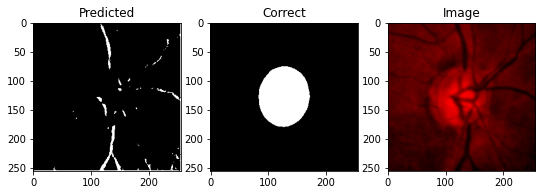

IOU: 0.024188052862882614
Dice: 0.04723361791772924
image #27


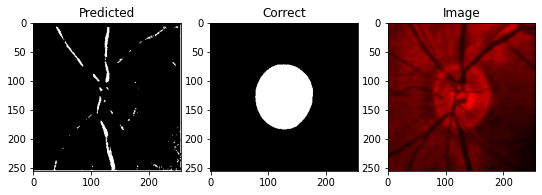

IOU: 0.036940835416316986
Dice: 0.0712496521013081
image #28


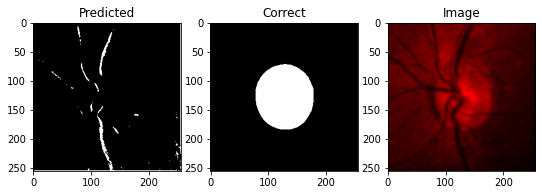

IOU: 0.025428682565689087
Dice: 0.04959619952494062
image #29


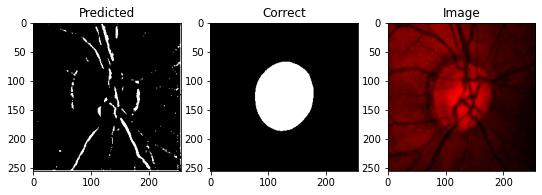

IOU: 0.0427408404648304
Dice: 0.08197787898503578
image #30


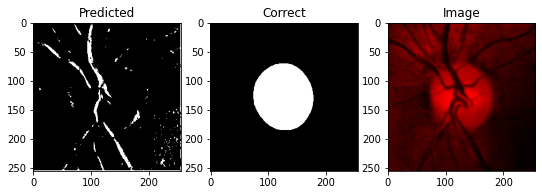

IOU: 0.060349300503730774
Dice: 0.11382909328114807
image #31


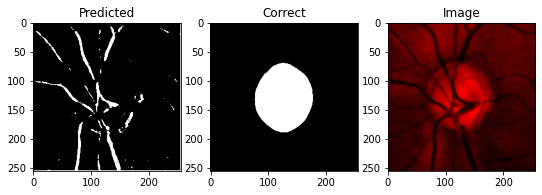

IOU: 0.06295297294855118
Dice: 0.11844921905970031
image #32


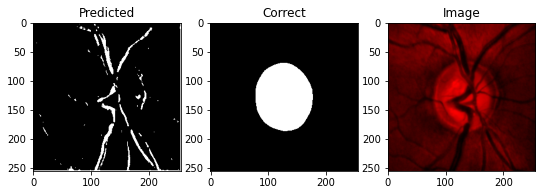

IOU: 0.06600716710090637
Dice: 0.12384
image #33


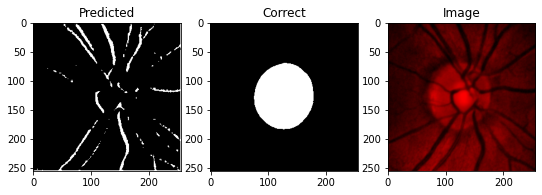

IOU: 0.0403849333524704
Dice: 0.07763459562020714
image #34


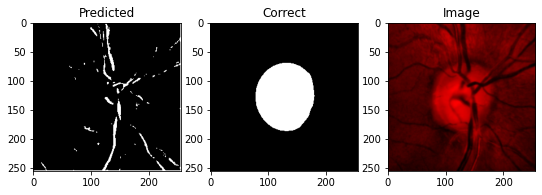

IOU: 0.06100296229124069
Dice: 0.11499112200896254
image #35


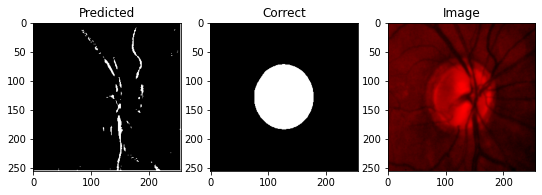

IOU: 0.03448275849223137
Dice: 0.06666666666666667
image #36


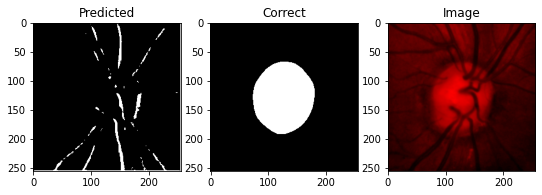

IOU: 0.02879517152905464
Dice: 0.055978433238185854
image #37


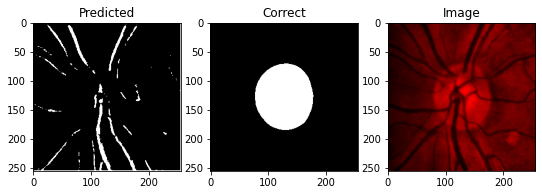

IOU: 0.0469815619289875
Dice: 0.08974668275030157
image #38


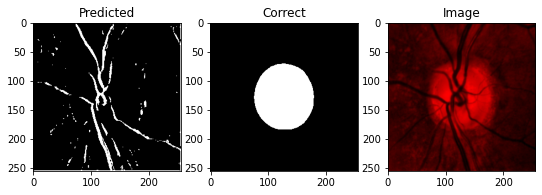

IOU: 0.09208633005619049
Dice: 0.1686429512516469
image #39


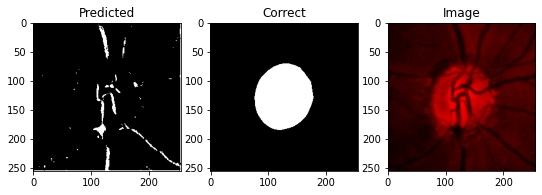

IOU: 0.05838380008935928
Dice: 0.11032632990612427
image #40


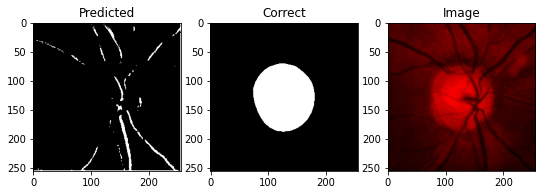

IOU: 0.030145978555083275
Dice: 0.05852758678517525
image #41


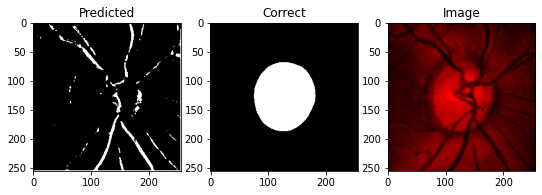

IOU: 0.04769814759492874
Dice: 0.09105322763306908
image #42


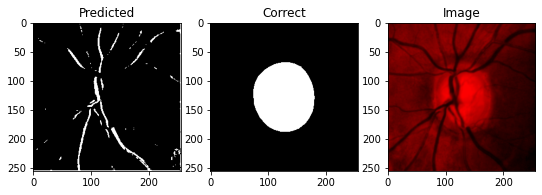

IOU: 0.05795897915959358
Dice: 0.10956753786986893
image #43


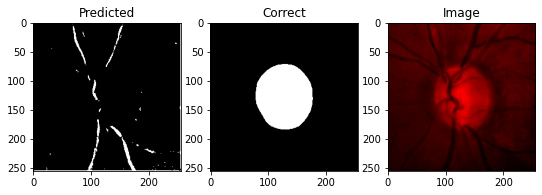

IOU: 0.022151898592710495
Dice: 0.043343653250773995
image #44


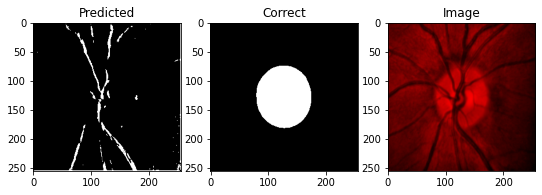

IOU: 0.05156703665852547
Dice: 0.09807655684631499
image #45


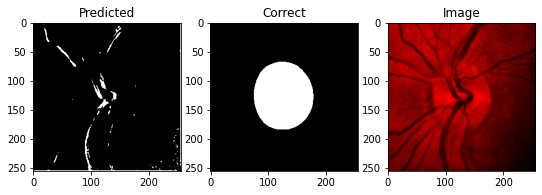

IOU: 0.04458657652139664
Dice: 0.08536693584168958
image #46


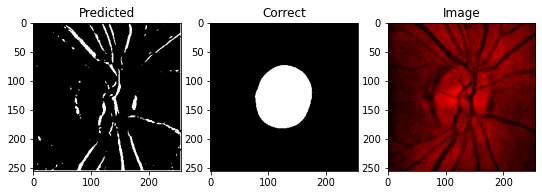

IOU: 0.05890006944537163
Dice: 0.11124764479397067
image #47


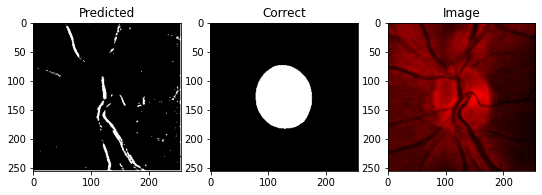

IOU: 0.0535784512758255
Dice: 0.10170756741625454
image #48


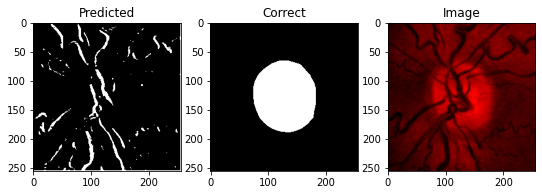

IOU: 0.06188029423356056
Dice: 0.11654852780806979
image #49


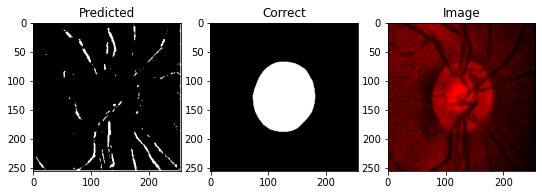

IOU: 0.016368450596928596
Dice: 0.032209678692665986
image #50


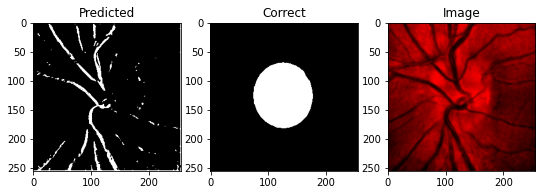

IOU: 0.07246618717908859
Dice: 0.13513934298614355


In [13]:
pred_iou, pred_dice, pred_disc = predict(l_channel_test, X_test, Z_test, model, img_size)

In [14]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

0.04596969
0.08738309375820588


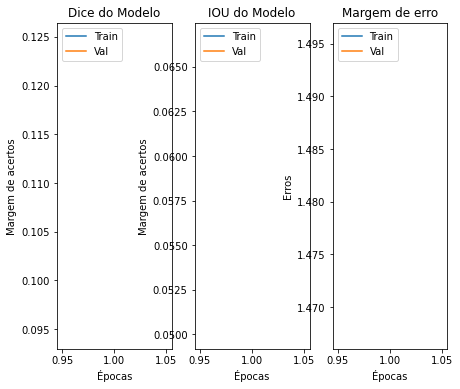

In [15]:
plot_results(history_cup, epochs)

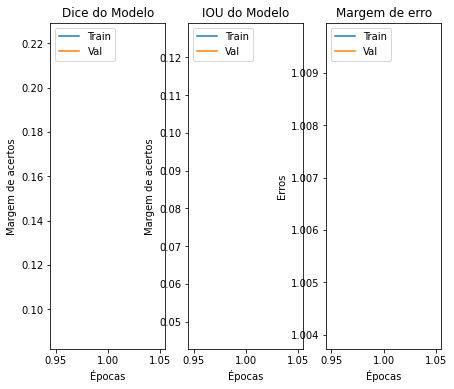

In [16]:
plot_results(history_disc, epochs)

In [17]:
result, diametros_cup, diametros_disc = create_table_result(pred_cup, pred_disc, test_idx)
pd.DataFrame(data= result)
pd.DataFrame(data={'cup': diametros_cup, 'disc': diametros_disc})

error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-sn_xpupm\opencv\modules\imgproc\src\shapedescr.cpp:360: error: (-201:Incorrect size of input array) There should be at least 5 points to fit the ellipse in function 'cv::fitEllipseNoDirect'
